# **Project-> Airbnb Seattle Data Analysis**

## Table of Contents
<ol>
<li><a href="#Business"> Business Understanding</a></li>
<li><a href="#Data">Data Understanding</a></li>
<li><a href="#Prepare">Data Preparation</a></li>
<li><a href="#Visualization">Visualization and  Results</a></li>
</ol>

<a id='Business'></a>
## 1. Business Understanding

This data is from Airbnb which contains info about renting of houses in Seattle.The data contains several details about different parameters such as availability, reviews, price, etc.
This project is associated with using this dataset as input and draw meaningful observations.

With the given dataset we will try to understand the following business questions:-

<l>
  
  **<li>Q1-> How many days in a year homes are available for rent in Seattle?</li>**
  **<li>Q2-> What's the trend of house renting in Seattle?</li>**
  **<li>Q3-> What's the renting charges of houses in the Seattle?</li>**
  **<li>Q4-> What's the trend of pricing through the whole year in Seattle?</li>**

</l>


<a id='Data'></a>
## 2. Data Understanding

Next, we want to move each of the business questions to data understanding:<br/>
We have a **calendar.csv** file which contians following fields:
<l>
    <li>**listing_id**-> Id's of the houses.</li> 
    <li>**date**-> Data were collected from 2016-01-04 to 2017-01-02.</li>
    <li>**available**-> Status of availability.</li>
    <li>**price**-> Rent of the house.</li>
<l>

**Importing necessary libraries.** <br/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading the dataset.** <br/>

In [2]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


**Let's see the data types of the fields of data.** 

In [3]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

### **Now we understanding our questions from the above data.**<br/>
**`1.` How many days in a year homes are available for rent in Seattle?**<br/>
To answer this question, we need the available column of the calendar dataframe of the dataset. We will also need the date column. There could be confusion in how this is interpreted, where I even interpreted incorrectly. I treated Nan's as values where a house was not listed, and dollar amounts as days that may have been booked or not booked.

**`2.` What's the trend of house renting in Seattle?**<br/>
To answer this question, we need access to the date column & available column of the calendar dataframe of dataset.
    
**`3.` What's the renting charges of houses in the Seattle?**<br/>
This question we will use the price column of the calendar dataframe of Seattle dataset.  However, different from the first question, we will also need the date column.

**`4.` What's the trend of pricing through the whole year in Seattle?**<br/>
Here we just need access to the price column in the calendar dataframe. However, different from the first question, we will also need the date column.


<a id='Prepare'></a>
## 3. Data Preparation 

Now in this section we are going to prepare the data for our visualization & answerig the above questions.<br/>
None of our questions really involve machine learning or predictive models of any kind.<br/>  Therefore, similar to the lessons, I won't have any questions focused on data modeling.  Instead for each of the above questions, I will break the data preparation and results into its own part.<br/>
First, let's read in the necessary libraries and datasets.

**Data Cleaning.**

In [4]:
# Now we are change these text values of available column to booleans for easier operations.
calendar['available'].replace('t',True, inplace=True)
calendar['available'].replace('f',False, inplace=True)
print(calendar.dtypes)

listing_id     int64
date          object
available       bool
price         object
dtype: object


**Finding info about the data to get an estimate about the number of null values in diffrerent columns**

In [5]:
print(calendar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null bool
price         934542 non-null object
dtypes: bool(1), int64(1), object(2)
memory usage: 33.2+ MB
None


In [6]:
print("NaN values in price column: ",calendar['price'].notnull().value_counts())

NaN values in price column:  True     934542
False    459028
Name: price, dtype: int64


**From the above result we can see that `price` is the only column which have some null values in it. So we need to fill or drop those row with some values <br/>
As price is an important column for analyzing the rent so we need to fill it with mean values of the price.** 


In [7]:
# First we need to clean the price data as it is in $ and also have some NaN values in it.
# So we create a new column called as `newprice` which contains only numbers.
calendar['newprice'] = calendar['price'].apply(lambda x: float(str(x).replace('$','').replace(',','')))

In [8]:
price_mean = round(calendar['newprice'].mean())
calendar['newprice']=calendar['newprice'].fillna(price_mean)

In [9]:
calendar.head()

,listing_id,date,available,price,newprice
0,241032,2016-01-04,True,$85.00,85.0
1,241032,2016-01-05,True,$85.00,85.0
2,241032,2016-01-06,False,NaN,138.0
3,241032,2016-01-07,False,NaN,138.0
4,241032,2016-01-08,False,NaN,138.0


<a id='Visualization'></a>
## 4. Visualization & Results

Now we visualize the prepaed data & find some insights form it to answer the questions:<br/>

**Q1-> How many days in a year homes are available for rent in Seattle?**

In [10]:
# Calculate poportion of how many days the house is available/unavailable in a year.
house_filled = calendar.groupby('listing_id').mean()['available'].reset_index()

# To check availabiity of the house we only need listing_id & days_available columns i.e we only keep them.
house_filled.columns = ['listing_id', 'days_available_prob']
house_filled['days_unavailable_prob'] = 1 - house_filled['days_available_prob']

         listing_id  days_available_prob  days_unavailable_prob
count  3.818000e+03          3818.000000            3818.000000
mean   5.550111e+06             0.670610               0.329390
std    2.962660e+06             0.347322               0.347322
min    3.335000e+03             0.000000               0.000000
25%    3.258256e+06             0.339726               0.013699
50%    6.118244e+06             0.843836               0.156164
75%    8.035127e+06             0.986301               0.660274
max    1.034016e+07             1.000000               1.000000


Text(0.5, 0, 'Percentage of Days Homes are Available')

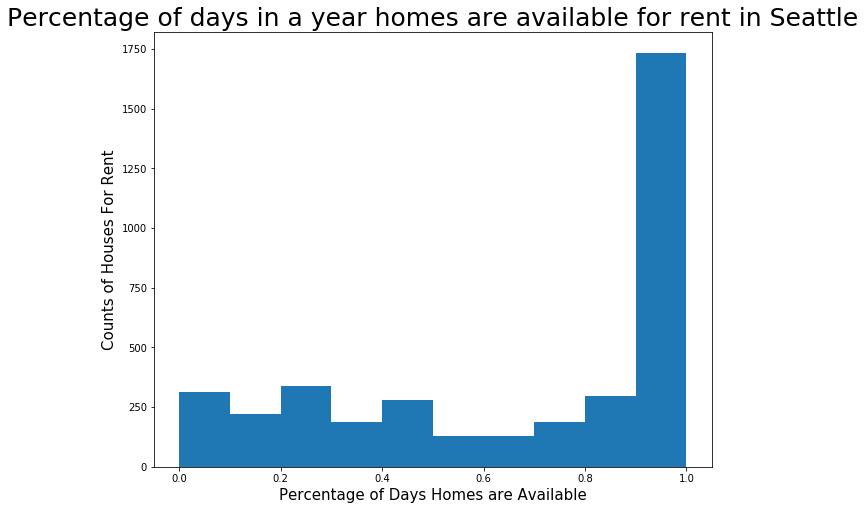

In [11]:
# Complete Seattle Information.
print(house_filled.describe())

# Its Histogram.
house_filled['days_available_prob'].hist(figsize=(10,8), bins=10,grid=False )
plt.title('Percentage of days in a year homes are available for rent in Seattle', fontdict={'fontsize': 25})
plt.ylabel('Counts of Houses For Rent',fontdict={'fontsize': 15})
plt.xlabel('Percentage of Days Homes are Available',fontdict={'fontsize': 15})

**From the above visualization we can say that In terms of the percentage of days a particular home is available in Seattle is quite interesting.<br/>
As you can see from the above visualization in Seattle a large number of homes are available for rent or lease in the market all year on Airbnb.<br/>
We can see that the no. of houses are drastically increases at 100 percent i.e mostly houses are available through the year for renting or lease in Seattle.**


**Q2-> What's the trend of house renting in Seattle?**

In [12]:
# Percentage of available homes per day in Seattle.
avail_homes_perday = calendar.groupby('date').mean()['available']
avail_homes_perday = avail_homes_perday.reset_index()
avail_homes_perday.head()

,date,available
0,2016-01-04,0.454426
1,2016-01-05,0.488999
2,2016-01-06,0.478261
3,2016-01-07,0.465165
4,2016-01-08,0.466737


Text(0, 0.5, 'Percentage of Available Houses')

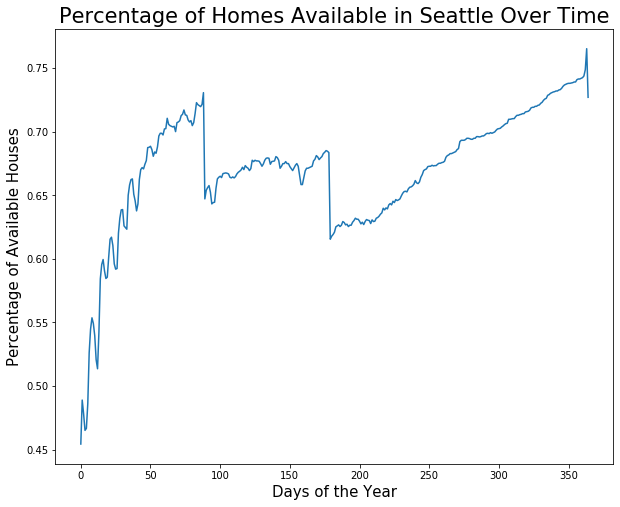

In [13]:
# Plotting the trend here.
avail_homes_perday['available'].plot( figsize=(10,8))
plt.title('Percentage of Homes Available in Seattle Over Time',fontdict={'fontsize': 21})
plt.xlabel('Days of the Year',fontdict={'fontsize': 15})
plt.ylabel('Percentage of Available Houses',fontdict={'fontsize': 15})

**From the above visualization overall we can safely say that Seattle Airbnb homes are available in large portion of time in year (~60%-78% availability at any time in year).<br/>
I think people are very much interested in giving their houses on rent in Seattle may be it is because house owners are not staying at thir homes for long time.**

**Q3-> What's the renting charges of houses in the Seattle?**

In [14]:
calendar.head()

,listing_id,date,available,price,newprice
0,241032,2016-01-04,True,$85.00,85.0
1,241032,2016-01-05,True,$85.00,85.0
2,241032,2016-01-06,False,NaN,138.0
3,241032,2016-01-07,False,NaN,138.0
4,241032,2016-01-08,False,NaN,138.0


In [15]:
# Just check how many values are unique after "$ 1K". 
calendar['newprice'][calendar['newprice'] > 1000].value_counts()

1099.0    120
1650.0     91
1199.0     71
1450.0     28
1250.0     15
1240.0      2
Name: newprice, dtype: int64

count    1.393570e+06
mean     1.379630e+02
std      8.603679e+01
min      1.000000e+01
25%      9.000000e+01
50%      1.380000e+02
75%      1.380000e+02
max      1.650000e+03
Name: newprice, dtype: float64


Text(0, 0.5, 'Count of Houses for Renting')

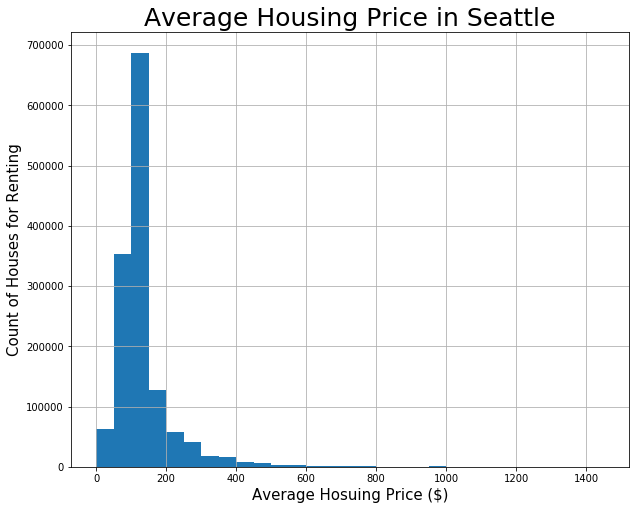

In [16]:
# Housing Prices for Seattle.
print(calendar['newprice'].describe())

# Now we plot the prices less than 1500 because after $1450 we only have $1650 in the data set.
calendar['newprice'] [calendar['newprice'] < 1500].hist(bins=np.arange(0,1500,50),figsize=(10,8))  
plt.title('Average Housing Price in Seattle',fontdict={'fontsize': 25})
plt.xlabel('Average Hosuing Price ($)',fontdict={'fontsize': 15})
plt.ylabel('Count of Houses for Renting',fontdict={'fontsize': 15})

**From the above visualization we can safely say that the following things:<br/>
The median house rent price is _138 dollars_ in Seattle.<br/>
The minimum house rent price is at _10 dollars_ which is quite interesting for having a house on rent &
The maximum house rent price is _1650 dollars_ in Seattle between June 2013 to January 2016.**

**Q4-> What's the trend of pricing through the whole year in Seattle?**

In [17]:
calendar.head()

,listing_id,date,available,price,newprice
0,241032,2016-01-04,True,$85.00,85.0
1,241032,2016-01-05,True,$85.00,85.0
2,241032,2016-01-06,False,NaN,138.0
3,241032,2016-01-07,False,NaN,138.0
4,241032,2016-01-08,False,NaN,138.0


In [18]:
# Perpare the data for plotting the trend.
price_perday = calendar.groupby('date').mean()['newprice']
price_perday = price_perday.reset_index()

price_perday['date'] = pd.to_datetime(price_perday['date'])

price_perday.head()

,date,newprice
0,2016-01-04,130.768203
1,2016-01-05,129.531168
2,2016-01-06,129.835254
3,2016-01-07,130.073075
4,2016-01-08,133.165008


Text(0, 0.5, 'Average Pricing of Available Houses($)')

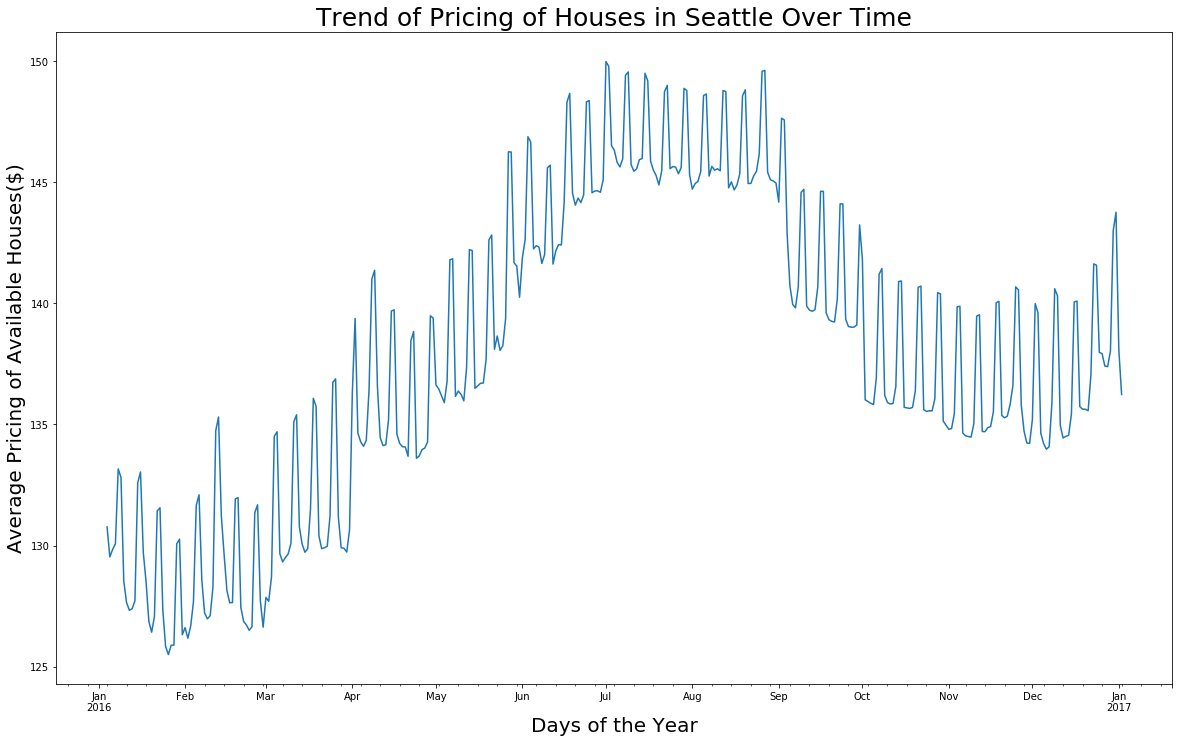

In [19]:
# Now plotting the trend here.
price_perday.set_index('date')['newprice'].plot(figsize=(20,12));
#plt.plot(price_perday['newprice'])
plt.title('Trend of Pricing of Houses in Seattle Over Time',fontdict={'fontsize': 25} )
plt.xlabel('Days of the Year',fontdict={'fontsize': 20})
plt.ylabel('Average Pricing of Available Houses($)',fontdict={'fontsize': 20})

**In the trend above we can clearly see that the price of houses are increased on the weekends & becomes average over the mid days through out the year. <br/> 
Some people changes their home prices continuously & some keep at one price over the week days. <br/>
Finally we can say that the renting price is maximum hike from the month of June to September. <br/>
I think it is because max people come there to enjoy their summer holidays & having fun in Seattle.**

## Conclusion

Now we have three high level takeaways include:<br/>

<ol>
<li>Seattle listings appear to have more availability through out the year, which may be reducing prices for those listings.</li>
<li>There are generally weekend price hike for Seattle homes because people come more on weekends there.</li>
<li>In Seattle, visitors care more about getting a cozy place there.</li>
</ol>

So I think people are choosing the houses based on their comfort level?